# Extendable and invertible manifold learning with geometry regularized autoencoders

**Authors:** Andres F. Duque, Sacha Morin, Guy Wolf, Kevin Moon.    
**Affiliation:** Utah State University, Univ. de Montreal.    
 
**Student Name:** Zhiyuan Ren  
**Student e-mail:** zhiyuanren@ucsb.edu

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


## 1. Introduction and motivation

The high dimensionality of modern data introduces significant challenges in descriptive and exploratory data analysis.These challenges gave rise to extensive work on dimensionality
reduction aiming to provide low dimensional representations
that preserve or uncover intrinsic patterns and structures in
processed data. A common assumption in such work is that
high dimensional measurements are a result of (often nonlinear)
functions applied to a small set of latent variables that control the observed phenomena of interest, and thus one can expect an
appropriate embedding in low dimensions to recover a faithful
latent data representation. While classic approaches, such as
principal component analysis (PCA) [1] and classical multidimensional scaling (MDS) [2], construct linear embeddings,
more recent attempts mostly focus on nonlinear dimensionality
reduction. These approaches include manifold learning kernel
methods and deep learning autoencoder methods, each with
their own benefits and deficiencies.  

Motivated by the complementary advantages provided by
AE and kernel methods, we introduce Geometry regularized
autoencoders, a general framework which splices the
well-established machinery from kernel methods to recover a
sensible geometry with the parametric structure of AEs. Thus
we gain the benefits of both methods, furnishing kernel methods
with efficient OOSE and inverse mapping, and providing
the autoencoder with a geometrically driven representation.

## 2. Background and related work

- **Manifold Learning:**  Manifold learning methods for dimensionality reduction typically assume data lie on a low dimensional manifold $\mathcal{M}$ immersed in the high dimensional ambient space. Therefore they aim to map points from $\mathcal{M}$ to a low dimensional Euclidean space that encodes or reveals its intrinsic geometry. However, in practice, such methods only consider a finite set of data points $x_{1}, \ldots, x_{n} \in \mathbb{R}^{\mathcal{D}}$ (for $\mathcal{D}$ dimensional ambient space), assumed to be sampled from $\mathcal{M}$, and optimize a fixed set of low dimensional points $y_{1}, \ldots, y_{n} \in \mathbb{R}^{d}$ (for $d \ll D$ ) such that the Euclidean relations between pairs $\left(y_{i}, y_{j}\right)$ will reflect intrinsic nonlinear relations between the corresponding $\left(x_{i}, x_{j}\right)$. Recent manifold learning kernel methods typically follow the framework introduced in [3] and further extended by t-SNE [4], which are themselves generalization of the metric MDS algorithm, whereby the coordinates in the latent space are optimized by gradient descent to recreate the pairwise similarities (as defined by a kernel) in the input space. Intuitively, the use of a kernel which outputs high similarities for close neighbors enables the capture of the curvature of the underlying manifold in the ambient space. t-SNE, for instance, uses normalized Gaussian similarities in the input space and t-distributed similarities in the latent space. The embedding is optimized so as to minimize the Kullback-Leibler divergence between both distributions.  
     
     
- **Autoencoders:** PCA naturally provides an extendable and (approximately) invertible embedding function, but falls short in capturing non-linear mappings. To see this, recall that the embedding function is constructed using a matrix $M$ with orthogonal columns consisting of principal components (PCs) such that $M M^{T}$ is a projection operator, thus acting as an identity on a hyperplane spanned by the PCs. Then, the embedding is given by the linear function $\hat{x}=M^{T} x$ and its inverse (on the embedded space) is given by $M \hat{x}=M M^{T} x \approx x$, where the approximation quality (i.e. reconstruction error) serves as the optimization target for computing the PCs in $M$.
To generalize this construction to nonlinear embedding functions over a data manifold $\mathcal{M}$, autoencoders (AEs) replace $M$ by an encoder function $f: \mathcal{M} \rightarrow \mathbb{R}^{d}$ and $M^{T}$ by a decoder function $f^{\dagger}: \mathbb{R}^{d} \rightarrow \mathcal{M}$, which is an approximate inverse of $f$. Both functions are parametrized by a neural network and trained via a reconstruction loss to ensure the composite function $f^{\dagger} \circ f$ acts as an identity on data sampled from $\mathcal{M}$. By considering datasets in matrix notation (i.e., with rows as datapoints), the AE optimization is generally formulated as
\begin{equation}
\underset{f, f^{\dagger}}{\arg \min } \mathcal{L}\left(f, f^{\dagger}\right)=\mathcal{L}_{r}\left(X, f^{\dagger}(f(X))\right) ...... (1)
\end{equation}  
where $f, f^{\dagger}$ are understood to be applied separately to each row in their input matrix (yielding corresponding output data points organized in matrix form), and $\mathcal{L}_{r}$ denotes a loss function that measures the discrepancy between the original and reconstructed data points (commonly MSE). It is common to select $d<\mathcal{D}$, forcing the autoencoder to find a representation in latent codes of dimension $d$ while retaining as much information for reconstruction as possible. In this case the autoencoder is undercomplete. Under this formulation, instead of learning new coordinates for the input data, we learn an embedding function $f$ and an inverse function $f^{\dagger}$. If $f$ is a linear function, the network will project onto the same subspace spanned by the principal components in PCA [5].

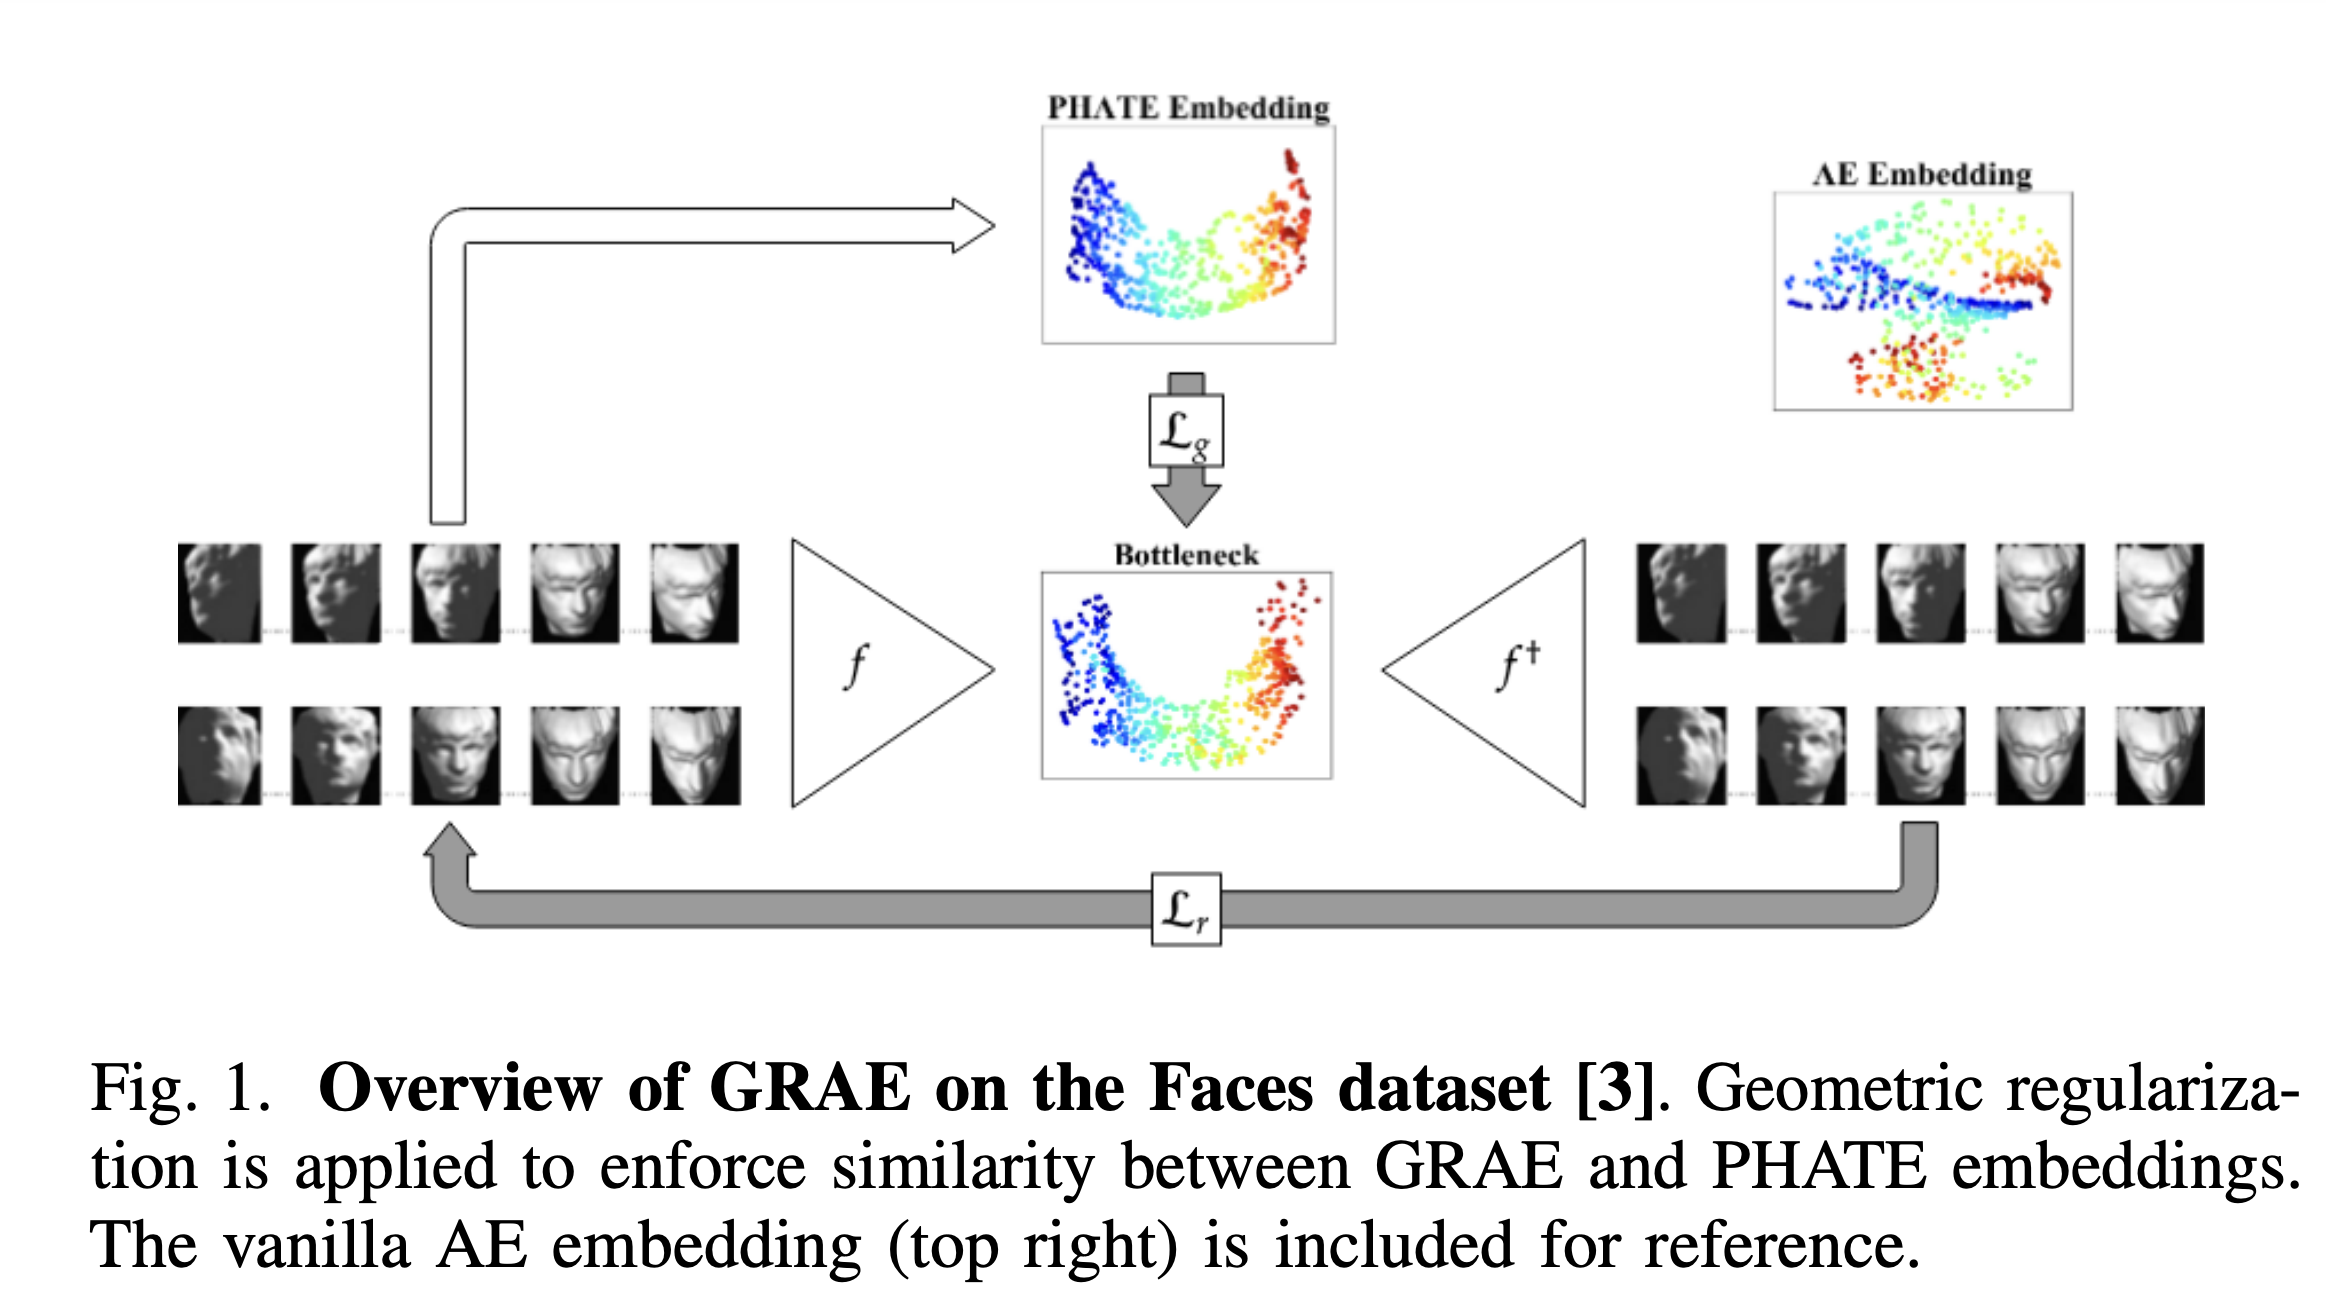

In [2]:
from IPython.display import Image
Image(filename =r'./imgs/fig-1.png')

## 3. Method  

The AE formulation presented (1) departs from manifold learning approaches as it lacks an explicit condition to recover geometrical interactions between observations. To fill that gap, we propose a general framework called Geometry regularized autoencoders which explicitly penalizes misguided representations in the latent space from a geometric perspective. Thus, we add a soft constraint in the bottleneck of the autoencoder as follows:  
\begin{equation}
\underset{f, f^{\dagger}}{\arg \min } \mathcal{L}\left(f, f^{\dagger}\right)=\mathcal{L}_{r}\left(X, f^{\dagger}(f(X))\right)+\lambda \mathcal{L}_{g}(f(X), \mathcal{E}) ...... (2)
\end{equation}
The $\mathcal{L}_{g}$ term in (2) is the geometric loss, penalizing the discrepancy between the latent representation and the embedding $\mathcal{E}$ previously learned by a manifold learning algorithm. Specifically, given an embedding of training points $\mathcal{E}=\left\{e_{1}, e_{2}, \ldots, e_{n}\right\}$,   
we define the geometric loss as $\mathcal{L}_{g}(f(X), \mathcal{E})=\sum_{i=1}^{n}\left\|e_{i}-f\left(x_{i}\right)\right\|^{2}$.  
The parameter $\lambda \geq 0$ determines how strongly the latent space of the AE should match the embedding $\mathcal{E}$. Thus the network will implicitly force the latent space of the autoencoder to preserve the relationships learned by the manifold learning technique, resulting in a non-linear embedding function $f$ and its inverse $f^{\dagger}$ that are consistent with sensible geometric properties. This regularization can be applied with any manifold learning approach, whether it be Isomap, t-SNE, etc. The resulting latent space will then inherit the corresponding strengths and weaknesses of the selected approach.  
  
To generate $\mathcal{E}$ in this work, we use PHATE [6] as it has proven to preserve long-range relationships (global structure) in a low-dimensional representation beyond the capabilities of spectral methods such as Laplacian eigenmaps, Diffusion Maps, LLE, and Isomap, especially when the dimension $d$ is required to be 2 or 3 for visualization. PHATE is built upon diffusion geometry [47]. PHATE first computes an $\alpha$-decay kernel with an adaptive bandwidth, which captures local geometry while remaining robust to density changes. The kernel matrix is normalized to obtain a probability transition matrix $P$ (diffusion operator) between every pair of points. Various scales of the geometry can then be uncovered by computing a $t$-step random walk over $P$, with a higher $t$ implying more diffusion, pushing transition probabilities to a more global scale.  
  
 The parameter $t$ is automatically chosen by studying the entropy of a distribution over the eigenvalues of $P$ (known as the von Neumann Entropy) as $t$ increases. Typically, the first few $t$-steps lead to a sharp drop in the entropy, which is thought in [4] to be the process of denoising the transition probabilities, whereas later steps will reduce entropy at a lower rate, thus, slowly losing meaningful information in the structure. Subsequently PHATE computes the so-called potential distances $D_{t}^{\prime}$, which have proven to be adequate distances between the transition probabilities encoded in $P^{t}$. Finally, metric MDS is applied to $D_{t}^{\prime}$ to optimally preserve the potential distances in a low-dimensional representation. Fig. 1 shows an overview of GRAE using the PHATE embedding.

## 4. Implement

In [3]:
!pip install --upgrade git+https://github.com/KevinMoonLab/GRAE.git
!pip install geomstats

  Cloning https://github.com/KevinMoonLab/GRAE.git to /private/var/folders/jw/0mfq32rd2h96ykq80fx1v9nw0000gn/T/pip-req-build-xp45iv4i
  Running command git clone --filter=blob:none --quiet https://github.com/KevinMoonLab/GRAE.git /private/var/folders/jw/0mfq32rd2h96ykq80fx1v9nw0000gn/T/pip-req-build-xp45iv4i
  Resolved https://github.com/KevinMoonLab/GRAE.git to commit 67635d36fd13bf664d821358911e044cc91e6e39
  Preparing metadata (setup.py) ... done


In [4]:
import os
import torch
import torch.nn as nn
import numpy as np
import scipy
from grae.data import RotatedDigits, Faces
from grae.data.base_dataset import DEVICE
from grae.data.base_dataset import FromNumpyDataset
from grae.models import BaseModel
from grae.models.base_model import SEED
from grae.models.manifold_tools import PHATE, UMAP
from grae.models.torch_modules import AutoencoderModule, ConvAutoencoderModule

import geomstats 
import geomstats.backend as gs
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.lie_group import LieGroup
from geomstats.geometry.stiefel import Stiefel

/Users/zhiyuanren/miniforge3/envs/grae/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/zhiyuanren/miniforge3/envs/grae/lib/python3.9/site-packages/numba/cpython/hashing.py:525: UserWarning: FNV hashing is not implemented in Numba. See PEP 456 https://www.python.org/dev/peps/pep-0456/ for rationale over not using FNV. Numba will continue to work, but hashes for built in types will be computed using siphash24. This will permit e.g. dictionaries to continue to behave as expected, however anything relying on the value of the hash opposed to hash as a derived property is likely to not work as expected.
  warnings.warn(msg)
INFO: Using numpy backend


In [5]:
BATCH_SIZE = 128
LR = .0001
WEIGHT_DECAY = 0
EPOCHS = 200
HIDDEN_DIMS = (800, 400, 200)  # Default fully-connected dimensions
CONV_DIMS = [32, 64]  # Default conv channels
CONV_FC_DIMS = [400, 200]  # Default fully-connected dimensions after convs


class AE(BaseModel):
    """Vanilla Autoencoder model.
    Trained with Adam and MSE Loss.
    Model will infer from the data whether to use a fully FC or convolutional + FC architecture.
    """

    def __init__(self, *,
                 lr=LR,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 weight_decay=WEIGHT_DECAY,
                 random_state=SEED,
                 n_components=2,
                 hidden_dims=HIDDEN_DIMS,
                 conv_dims=CONV_DIMS,
                 conv_fc_dims=CONV_FC_DIMS,
                 noise=0,
                 patience=50,
                 data_val=None,
                 comet_exp=None,
                 write_path=''):
        """Init. Arguments specify the architecture of the encoder. Decoder will use the reversed architecture.
        Args:
            lr(float): Learning rate.
            epochs(int): Number of epochs for model training.
            batch_size(int): Mini-batch size.
            weight_decay(float): L2 penalty.
            random_state(int): To seed parameters and training routine for reproducible results.
            n_components(int): Bottleneck dimension.
            hidden_dims(List[int]): Number and size of fully connected layers for encoder. Do not specify the input
            layer or the bottleneck layer, since they are inferred from the data or from the n_components
            argument respectively. Decoder will use the same dimensions in reverse order. This argument is only used if
            provided samples are flat vectors.
            conv_dims(List[int]): Specify the number of convolutional layers. The int values specify the number of
            channels for each layer. This argument is only used if provided samples are images (i.e. 3D tensors)
            conv_fc_dims(List[int]): Number and size of fully connected layers following the conv_dims convolutionnal
            layer. No need to specify the bottleneck layer. This argument is only used if provided samples
            are images (i.e. 3D tensors)
            noise(float): Variance of the gaussian noise injected in the bottleneck before reconstruction.
            patience(int): Epochs with no validation MSE improvement before early stopping.
            data_val(BaseDataset): Split to validate MSE on for early stopping.
            comet_exp(Experiment): Comet experiment to log results.
            write_path(str): Where to write temp files.
        """
        self.random_state = random_state
        self.n_components = n_components
        self.hidden_dims = hidden_dims
        self.fitted = False  # If model was fitted
        self.torch_module = None  # Will be initialized to the appropriate torch module when fit method is called
        self.optimizer = None  # Will be initialized to the appropriate optimizer when fit method is called
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.weight_decay = weight_decay
        self.criterion = nn.MSELoss(reduction='mean')
        self.conv_dims = conv_dims
        self.conv_fc_dims = conv_fc_dims
        self.noise = noise
        self.comet_exp = comet_exp
        self.data_shape = None  # Shape of input data
    
#         self.data_demo_1 = Hypersphere(dim=2)
#         self.data_demo_2 = LieGroup(2)
#         self.data_demo_3 = Stiefel(2,4)

        # Early stopping attributes
        self.data_val = data_val
        self.val_loader = None
        self.patience = patience
        self.current_loss_min = np.inf
        self.early_stopping_count = 0
        self.write_path = write_path

    def init_torch_module(self, data_shape, vae=False, sigmoid=False):
        """Infer autoencoder architecture (MLP or Convolutional + MLP) from data shape.
        Initialize torch module.
        Args:
            data_shape(tuple[int]): Shape of one sample.
            vae(bool): Make this architecture a VAE.
            sigmoid(bool): Apply sigmoid to decoder output.
        """
        # Infer input size from data. Initialize torch module and optimizer
        if len(data_shape) == 1:
            # Samples are flat vectors. MLP case
            input_size = data_shape[0]
            self.torch_module = AutoencoderModule(input_dim=input_size,
                                                  hidden_dims=self.hidden_dims,
                                                  z_dim=self.n_components,
                                                  noise=self.noise,
                                                  vae=vae,
                                                  sigmoid=sigmoid)
        elif len(data_shape) == 3:
            in_channel, height, width = data_shape
            #  Samples are 3D tensors (i.e. images). Convolutional case.
            self.torch_module = ConvAutoencoderModule(H=height,
                                                      W=width,
                                                      input_channel=in_channel,
                                                      channel_list=self.conv_dims,
                                                      hidden_dims=self.conv_fc_dims,
                                                      z_dim=self.n_components,
                                                      noise=self.noise,
                                                      vae=vae,
                                                      sigmoid=sigmoid)
        else:
            raise Exception(f'Invalid channel number. X has {len(data_shape)}')

        self.torch_module.to(DEVICE)

    def fit(self, x):
        """Fit model to data.
        Args:
            x(BaseDataset): Dataset to fit.
        """

        # Reproducibility
        torch.manual_seed(self.random_state)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

        # Save data shape
        self.data_shape = x[0][0].shape

        # Fetch appropriate torch module
        if self.torch_module is None:
            self.init_torch_module(self.data_shape)

        # Optimizer
        self.optimizer = torch.optim.Adam(self.torch_module.parameters(),
                                          lr=self.lr,
                                          weight_decay=self.weight_decay)
        # Train AE
        # Training steps are decomposed as calls to specific methods that can be overriden by children class if need be
        self.torch_module.train()

        self.loader = self.get_loader(x)

        if self.data_val is not None:
            self.val_loader = self.get_loader(self.data_val)

        # Get first metrics
        self.log_metrics(0)

        for epoch in range(1, self.epochs + 1):
            # print(f'            Epoch {epoch}...')
            for batch in self.loader:
                self.optimizer.zero_grad()
                self.train_body(batch)
                self.optimizer.step()

            self.log_metrics(epoch)
            self.end_epoch(epoch)

            # Early stopping
            if self.early_stopping_count == self.patience:
                if self.comet_exp is not None:
                    self.comet_exp.log_metric('early_stopped',
                                              epoch - self.early_stopping_count)
                break

        # Load checkpoint if it exists
        checkpoint_path = os.path.join(self.write_path, 'checkpoint.pt')

        if os.path.exists(checkpoint_path):
            self.load(checkpoint_path)
            os.remove(checkpoint_path)

    def get_loader(self, x):
        """Fetch data loader.
        Args:
            x(BaseDataset): Data to be wrapped in loader.
        Returns:
            torch.utils.data.DataLoader: Torch DataLoader for mini-batch training.
        """
        return torch.utils.data.DataLoader(x, batch_size=self.batch_size, shuffle=True)

    def train_body(self, batch):
        """Called in main training loop to update torch_module parameters.
        Args:
            batch(tuple[torch.Tensor]): Training batch.
        """
        data, _, idx = batch  # No need for labels. Training is unsupervised
        data = data.to(DEVICE)

        x_hat, z = self.torch_module(data)  # Forward pass
        self.compute_loss(data, x_hat, z, idx)

    def compute_loss(self, x, x_hat, z, idx):
        """Apply loss to update parameters following a forward pass.
        Args:
            x(torch.Tensor): Input batch.
            x_hat(torch.Tensor): Reconstructed batch (decoder output).
            z(torch.Tensor): Batch embedding (encoder output).
            idx(torch.Tensor): Indices of samples in batch.
        """
        loss = self.criterion(x_hat, x)
        loss.backward()

    def end_epoch(self, epoch):
        """Method called at the end of every training epoch.
        Args:
            epoch(int): Current epoch.
        """
        pass

    def eval_MSE(self, loader):
        """Compute MSE on data.
        Args:
            loader(DataLoader): Dataset loader.
        Returns:
            float: MSE.
        """
        # Compute MSE over dataset in loader
        self.torch_module.eval()
        sum_loss = 0

        for batch in loader:
            data, _, idx = batch  # No need for labels. Training is unsupervised
            data = data.to(DEVICE)

            x_hat, z = self.torch_module(data)  # Forward pass
            sum_loss += data.shape[0] * self.criterion(data, x_hat).item()

        self.torch_module.train()

        return sum_loss / len(loader.dataset)  # Return average per observation

    def log_metrics(self, epoch):
        """Log metrics.
        Args:
            epoch(int): Current epoch.
        """
        self.log_metrics_train(epoch)
        self.log_metrics_val(epoch)

    def log_metrics_val(self, epoch):
        """Compute validation metrics, log them to comet if need be and update early stopping attributes.
        Args:
            epoch(int):  Current epoch.
        """
        # Validation loss
        if self.val_loader is not None:
            val_mse = self.eval_MSE(self.val_loader)

            if self.comet_exp is not None:
                with self.comet_exp.validate():
                    self.comet_exp.log_metric('MSE_loss', val_mse, epoch=epoch)

            if val_mse < self.current_loss_min:
                # If new min, update attributes and checkpoint model
                self.current_loss_min = val_mse
                self.early_stopping_count = 0
                self.save(os.path.join(self.write_path, 'checkpoint.pt'))
            else:
                self.early_stopping_count += 1

    def log_metrics_train(self, epoch):
        """Log train metrics, log them to comet if need be and update early stopping attributes.
        Args:
            epoch(int):  Current epoch.
        """
        # Train loss
        if self.comet_exp is not None:
            train_mse = self.eval_MSE(self.loader)
            with self.comet_exp.train():
                self.comet_exp.log_metric('MSE_loss', train_mse, epoch=epoch)

    def transform(self, x):
        """Transform data.
        Args:
            x(BaseDataset): Dataset to transform.
        Returns:
            ndarray: Embedding of x.
        """
        self.torch_module.eval()
        loader = torch.utils.data.DataLoader(x, batch_size=self.batch_size,
                                             shuffle=False)
        z = [self.torch_module.encoder(batch.to(DEVICE)).cpu().detach().numpy() for batch, _, _ in loader]
        return np.concatenate(z)

    def inverse_transform(self, x):
        """Take coordinates in the embedding space and invert them to the data space.
        Args:
            x(ndarray): Points in the embedded space with samples on the first axis.
        Returns:
            ndarray: Inverse (reconstruction) of x.
        """
        self.torch_module.eval()
        x = FromNumpyDataset(x)
        loader = torch.utils.data.DataLoader(x, batch_size=self.batch_size,
                                             shuffle=False)
        x_hat = [self.torch_module.decoder(batch.to(DEVICE)).cpu().detach().numpy()
                 for batch in loader]

        return np.concatenate(x_hat)

    def save(self, path):
        """Save state dict.
        Args:
            path(str): File path.
        """
        state = self.torch_module.state_dict()
        state['data_shape'] = self.data_shape
        torch.save(state, path)

    def load(self, path):
        """Load state dict.
        Args:
            path(str): File path.
        """
        state = torch.load(path)
        data_shape = state.pop('data_shape')

        if self.torch_module is None:
            self.init_torch_module(data_shape)

        self.torch_module.load_state_dict(state)


class GRAEBase(AE):
    """Standard GRAE class.
    AE with geometry regularization. The bottleneck is regularized to match an embedding precomputed by a manifold
    learning algorithm.
    """

    def __init__(self, *, embedder, embedder_params, lam=100, relax=False, **kwargs):
        """Init.
        Args:
            embedder(BaseModel): Manifold learning class constructor.
            embedder_params(dict): Parameters to pass to embedder.
            lam(float): Regularization factor.
            relax(bool): Use the lambda relaxation scheme. Set to false to use constant lambda throughout training.
            **kwargs: All other arguments with keys are passed to the AE parent class.
        """
        super().__init__(**kwargs)
        self.lam = lam
        self.lam_original = lam  # Needed to compute the lambda relaxation
        self.target_embedding = None  # To store the target embedding as computed by embedder
        self.relax = relax
        self.embedder = embedder(random_state=self.random_state,
                                 n_components=self.n_components,
                                 **embedder_params)  # To compute target embedding.

    def fit(self, x):
        """Fit model to data.
        Args:
            x(BaseDataset): Dataset to fit.
        """
        print('       Fitting GRAE...')
        print('           Fitting manifold learning embedding...')
        emb = scipy.stats.zscore(self.embedder.fit_transform(x))  # Normalize embedding
        self.target_embedding = torch.from_numpy(emb).float().to(DEVICE)

        print('           Fitting encoder & decoder...')
        super().fit(x)

    def compute_loss(self, x, x_hat, z, idx):
        """Compute torch-compatible geometric loss.
        Args:
            x(torch.Tensor): Input batch.
            x_hat(torch.Tensor): Reconstructed batch (decoder output).
            z(torch.Tensor): Batch embedding (encoder output).
            idx(torch.Tensor): Indices of samples in batch.
        """
        if self.lam > 0:
            loss = self.criterion(x, x_hat) + self.lam * self.criterion(z, self.target_embedding[idx])
        else:
            loss = self.criterion(x, x_hat)

        loss.backward()

    def log_metrics_train(self, epoch):
        """Log train metrics to comet if comet experiment was set.
        Args:
            epoch(int): Current epoch.
        """
        if self.comet_exp is not None:

            # Compute MSE and Geometric Loss over train set
            self.torch_module.eval()
            sum_loss = 0
            sum_geo_loss = 0

            for batch in self.loader:
                data, _, idx = batch  # No need for labels. Training is unsupervised
                data = data.to(DEVICE)

                x_hat, z = self.torch_module(data)  # Forward pass
                sum_loss += data.shape[0] * self.criterion(data, x_hat).item()
                sum_geo_loss += data.shape[0] * self.criterion(z, self.target_embedding[idx]).item()

            with self.comet_exp.train():
                mse_loss = sum_loss / len(self.loader.dataset)
                geo_loss = sum_geo_loss / len(self.loader.dataset)
                self.comet_exp.log_metric('MSE_loss', mse_loss, epoch=epoch)
                self.comet_exp.log_metric('geo_loss', geo_loss, epoch=epoch)
                self.comet_exp.log_metric('GRAE_loss', mse_loss + self.lam * geo_loss, epoch=epoch)
                if self.lam * geo_loss > 0:
                    self.comet_exp.log_metric('geo_on_MSE', self.lam * geo_loss / mse_loss, epoch=epoch)

            self.torch_module.train()

    def end_epoch(self, epoch):
        """Method called at the end of every training epoch.
        Now using a scheme adapted to early stopping : turn off geometric regularization when reaching 50 % of patience
        Args:
            epoch(int): Current epoch.
        """
        if self.relax and self.lam > 0 and self.early_stopping_count == int(self.patience / 2):
            self.lam = 0  # Turn off constraint

            if self.comet_exp is not None:
                self.comet_exp.log_metric('relaxation', epoch, epoch=epoch)

        # Sigmoid shape that quickly drops from lam_original to 0 around 50 % of training epochs.
        # if self.relax:
        #     self.lam = (-self.lam_original * np.exp((epoch - (self.epochs / 2)) * 0.2)) / (
        #             1 + np.exp((epoch - (self.epochs / 2)) * 0.2)) \
        #                + self.lam_original


class GRAE(GRAEBase):
    """Standard GRAE class with PHATE-based geometric regularization.
    AE with geometry regularization. The bottleneck is regularized to match an embedding precomputed by the PHATE
    manifold learning algorithm.
    """

    def __init__(self, *, lam=100, knn=5, gamma=1, t='auto', relax=False, **kwargs):
        """Init.
        Args:
            lam(float): Regularization factor.
            knn(int): knn argument of PHATE. Number of neighbors to consider in knn graph.
            t(int): Number of steps of the diffusion operator. Can also be set to 'auto' to select t according to the
            knee point in the Von Neumann Entropy of the diffusion operator
            gamma(float): Informational distance.
            relax(bool): Use the lambda relaxation scheme. Set to false to use constant lambda throughout training.
            **kwargs: All other kehyword arguments are passed to the GRAEBase parent class.
        """
        super().__init__(lam=lam,
                         relax=relax,
                         embedder=PHATE,
                         embedder_params=dict(knn=knn,
                                              t=t,
                                              gamma=gamma,
                                              verbose=0,
                                              n_jobs=-1),
                         **kwargs)


class GRAE_R(GRAEBase):
    """Relaxed GRAE class with PHATE-based geometric regularization.
    """

    def __init__(self, *, lam=10, knn=5, gamma=1, t='auto', **kwargs):
        """Init.
        Args:
            lam(float): Initial regularization factor. Will be relaxed throughout training.
            knn(int): knn argument of PHATE. Number of neighbors to consider in knn graph.
            t(int): Number of steps of the diffusion operator. Can also be set to 'auto' to select t according to the
            knee point in the Von Neumann Entropy of the diffusion operator
            gamma(float): Informational distance.
            **kwargs: All other keyword arguments are passed to the GRAEBase parent class.
        """
        super().__init__(lam=lam,
                         relax=True,
                         embedder=PHATE,
                         embedder_params=dict(knn=knn,
                                              t=t,
                                              gamma=gamma,
                                              verbose=0,
                                              n_jobs=-1),
                         **kwargs)


class SmallGRAE(GRAE):
    """GRAE class with fixed small geometric regularization factor."""

    def __init__(self, *, knn=5, t='auto', **kwargs):
        """Init.
        Args:
            knn(int): knn argument of PHATE. Number of neighbors to consider in knn graph.
            t(int): Number of steps of the diffusion operator. Can also be set to 'auto' to select t according to the
            knee point in the Von Neumann Entropy of the diffusion operator
            **kwargs: All other arguments with keys are passed to the GRAE parent class.
        """
        super().__init__(lam=.1, relax=False, knn=knn, t=t, **kwargs)


class LargeGRAE(GRAE):
    """GRAE class with fixed large geometric regularization factor."""

    def __init__(self, *, knn=5, t='auto', **kwargs):
        """Init.
        Args:
            knn(int): knn argument of PHATE. Number of neighbors to consider in knn graph.
            t(int): Number of steps of the diffusion operator. Can also be set to 'auto' to select t according to the
            knee point in the Von Neumann Entropy of the diffusion operator
            **kwargs: All other arguments with keys are passed to the GRAE parent class.
        """
        super().__init__(lam=100, relax=False, knn=knn, t=t, **kwargs)


class GRAEUMAP(GRAEBase):
    """GRAE with UMAP regularization."""

    def __init__(self, *, lam=100, n_neighbors=15, min_dist=.1, relax=False, **kwargs):
        """Init.
        Args:
            lam(float): Regularization factor.
            n_neighbors(int): The size of local neighborhood (in terms of number of neighboring sample points) used for
            manifold approximation.
            min_dist(float):  The effective minimum distance between embedded points.
            relax(bool): Use the lambda relaxation scheme. Set to false to use constant lambda throughout training.
            **kwargs: All other arguments with keys are passed to the GRAEBase parent class.
        """
        super().__init__(lam=lam,
                         embedder=UMAP,
                         embedder_params=dict(n_neighbors=n_neighbors, min_dist=min_dist),
                         relax=relax,
                         **kwargs)


class GRAEUMAP_R(GRAEBase):
    """Relaxed GRAE with UMAP regularization."""

    def __init__(self, *, lam=10, n_neighbors=15, min_dist=.1, **kwargs):
        """Init.
        Args:
            lam(float): Initial regularization factor. Will be relaxed throughout training.
            n_neighbors(int): The size of local neighborhood (in terms of number of neighboring sample points) used for
            manifold approximation.
            min_dist(float):  The effective minimum distance between embedded points.
            relax(bool): Use the lambda relaxation scheme. Set to false to use constant lambda throughout training.
            **kwargs: All other arguments with keys are passed to the GRAEBase parent class.
        """
        super().__init__(lam=lam,
                         embedder=UMAP,
                         embedder_params=dict(n_neighbors=n_neighbors, min_dist=min_dist),
                         relax=True,
                         **kwargs)

## 5. Demonstration and Analysis

### A - Rotated Digits Testing

In [6]:
# Various autoencoder parameters can be changed
# t and knn are PHATE parameters, which are used to compute a target embedding
m = GRAE(epochs=100, n_components=2, lr=.0001, batch_size=128, t=50, knn=10)

# Input data should be an instance of grae.data.BaseDataset
# We already have subclasses for datasets in the paper
data = RotatedDigits(data_path='data', split='train')

# Fit model
m.fit(data)

# Get 2D latent coordinates
z = m.transform(data)

# Compute some image reconstructions
imgs = m.inverse_transform(z)

       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...


       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...


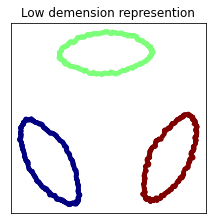

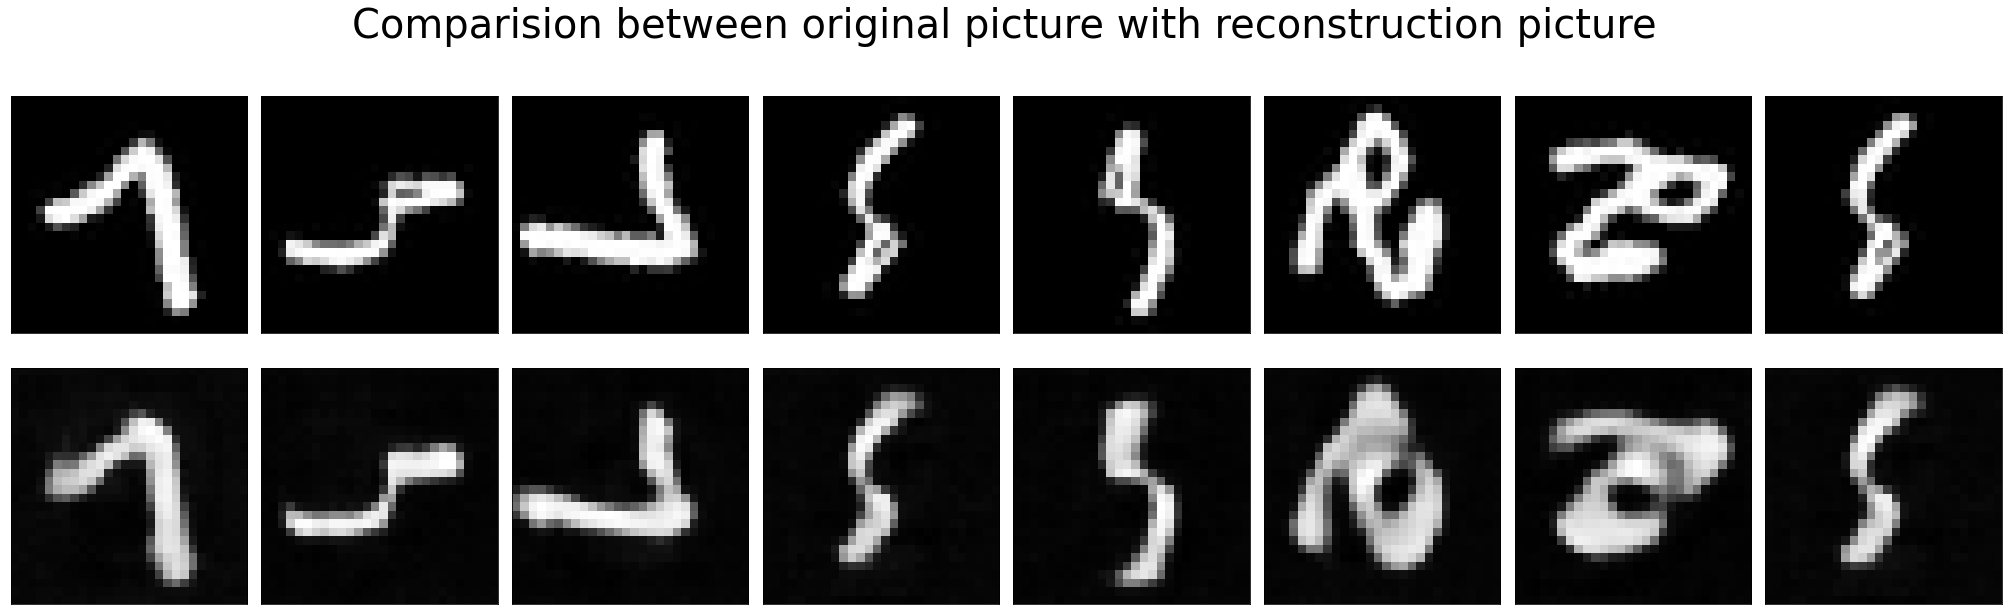

In [7]:
# Fit, transform and plot data
m.fit_plot(data,title='Low demension represention')

# Transform, inverse transform and visualize reconstructions
m.view_img_rec(data,title='Comparision between original picture with reconstruction picture')

We can see that after geometry regularized autoencoders training, the model's latent represention will be very clearly seperate in 2-d space, which means the model training process works a lot.  
And from second figure above, originial pictures in first row are very similar to the pictures generated by decoder.  
So in summary, this method present
a general approach to leverage traditional dimensionality
reduction and manifold learning methods, providing them with
a natural OOSE and an invertible mapping. 

### B - SwissRoll Manifold Testing

In [8]:
from grae.data import manifolds
import matplotlib.pyplot as plt

In [9]:
# The data should be from class BaseDataset
data_train =  manifolds.SwissRoll(n_samples = 10000, split='train')
data_test =  manifolds.SwissRoll(n_samples = 10000, split='test')

       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...


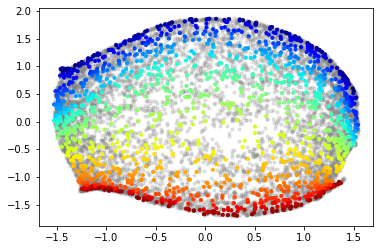

In [10]:
model = GRAE(knn=20, t=50, n_components = 2, hidden_dims = [500, 300, 100], epochs = 100)
model.fit(data_train)
z_train =  model.transform(data_train)
z_test  =  model.transform(data_test)
ax = plt.axes()
ax.scatter(z_train[:,0], z_train[:,1], c = "grey", cmap = "jet",
           s = 10, alpha = 0.2)
ax.scatter(z_test[:,0], z_test[:,1], c  = data_test.targets, cmap = "jet", s = 10)

In SwissRoll manifold space, date with different categories are clearly seperated into different represention shape in 2d-space.

### C - Comparsion with other methods

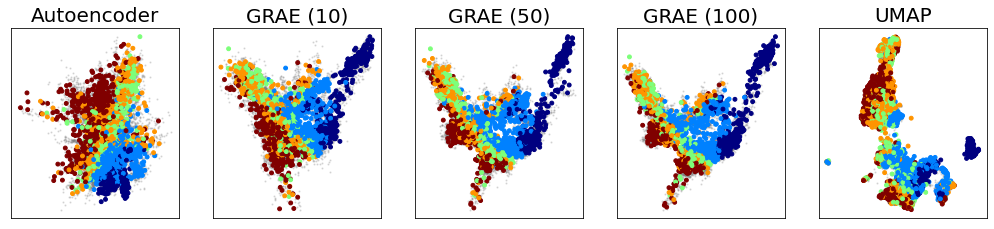

In [11]:
# PLOT_RUN = 1


# titles = [model_name[m] for m in MODELS]
# n_d = len(DATASETS)
# n_m = len(MODELS)
# fig, ax = plt.subplots(n_d, n_m, figsize=(n_m * 3.5, n_d * 3.5))

# for j, model in enumerate(MODELS):
#   for i, dataset in enumerate(DATASETS):
#     file_path = os.path.join('embeddings', model, dataset, f'run_{PLOT_RUN}.pkl')

#     if os.path.exists(file_path):
#       # Retrieve datasets for coloring
#       data = load_dict(file_path)
#       X_train = dataset_constructors[dataset](split='train',
#                                               seed=data['dataset_seed'])
#       X_test = dataset_constructors[dataset](split='test',
#                                              seed=data['dataset_seed'])
#       _, y_train = X_train.numpy()
#       _, y_test = X_test.numpy()
#       z_train, z_test = data['z_train'], data['z_test']
#     else:
#       # Filler if plot is not found
#       z_train, z_test = np.array([[0, 0]]), np.array([[0, 0]])
#       y_train = np.array([1])
#       y_test = np.array([1])


#     if n_d == 1:
#       ax_i = ax[j]
#     elif n_m == 1:
#       ax_i = ax[i]
#     else:
#       ax_i = ax[i, j]

#     l = ax_i.scatter(*z_train.T, s = 1.5,  alpha=.2, color='grey')

#     ax_i.scatter(*z_test.T, c = y_test, s = 15, cmap='jet')



#     if i == 0:
#       ax_i.set_title(f'{titles[j]}', fontsize=20, color='black')
#     ax_i.set_xticks([])
#     ax_i.set_yticks([])


# plt.savefig(os.path.join('results', /imgs/fig-2.png))
# plt.show()
Image(filename =r'./imgs/fig-2.png')

From this fig, we can see that geometry regularized autoencoders have more clear seperation in low dimension space than Autoencoder and UMAP. As training epochs increase, the seperation of representation will be more clear.

## 6. Conclusion

Geometry regularized autoencoder, a
general parametric framework to enhance autoencoders’ latent
representation by taking advantage of well-established manifold
learning methods. By imposing a geometrical soft constraint on
the bottleneck of the autoencoder, we demonstrated empirically
how GRAE can achieve good visualizations and good latent
representations on several performance metrics compared to
AE and other methods motivated by geometry. Furthermore,
GRAE is equipped with an inverse mapping that often produces
a better reconstruction than AE. While the primary focus
of this work is on using PHATE embeddings to regularize
the bottleneck, future work will focus on the study of other
manifold learning algorithms as constraints for learning AE
representations with better geometry and the benefits they bring
in terms of visualizations, reconstruction, and data generation.

## Reference

[1] K. Pearson, “LIII. On lines and planes of closest fit to systems of points
in space,” The London, Edinburgh, and Dublin Philosophical Magazine
and Journal of Science, vol. 2, no. 11, pp. 559–572, 1901.  
[2] M. A. Cox and T. F. Cox, “Multidimensional scaling,” in Handbook of
data visualization. Springer, 2008, pp. 315–347.  
[3] G. E. Hinton and S. Roweis, “Stochastic neighbor embedding,” NeurIPS,
vol. 15, no. Nov, p. 833–840, 2008.  
[4] L. v. d. Maaten and G. E. Hinton, “Visualizing data using t-SNE,” Journal
of machine learning research, vol. 9, no. Nov, pp. 2579–2605, 2008.  
[5] P. Baldi and K. Hornik, “Neural networks and principal component
analysis: Learning from examples without local minima,” Neural
networks, vol. 2, no. 1, pp. 53–58, 1989.  
[6] K. R. Moon et al., “Visualizing structure and transitions in highdimensional biological data,” Nature Biotechnology, vol. 37, no. 12,
pp. 1482–1492, 2019.  
[7] B. Nadler, S. Lafon, I. Kevrekidis, and R. R. Coifman, “Diffusion maps,
spectral clustering and eigenfunctions of fokker-planck operators,” in
NeurIPS, 2006, pp. 955–962.